### Image Classifier (Happy or Sad)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os #This module provides a portable way of using operating system dependent functionality.
          #If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module,
          #and if you want to read all the lines in all the files on the command line see the fileinput module.
import cv2  # OpenCV-Python is a library of Python bindings designed to solve computer vision problems
import imghdr  # The imghdr module determines the type of image contained in a file or byte stream.

C:\Users\Prasad\AppData\Local\Temp\ipykernel_11360\801849172.py:11: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr  # The imghdr module determines the type of image contained in a file or byte stream.


In [2]:
data_dir = 'data'

In [3]:
# List of extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
# Checking the path for data directory
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [5]:
# Checking the path for data directory and in happy folder
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150708124649-simple-secret-happy-life-woman-enjoy-joy.jpeg',
 '2560px-Happy_People.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '6a4264642bba4cbce747ef68613fa71122b7db1f8ab4fa1c7bedeab635dd1146.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blackandwhite-7402145_640.jpg',
 'boy-2604853_640.jpg',
 'children-593313_640.jpg',
 'compassion.jpg',
 'couple-1838940_640.jpg',
 'diverse-happy-people-united-concept-101678776.jpg',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821-1490x838.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808336_

In [6]:
# Looping through both the folders (happy and sad)
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png
1HEoLBLidT2u4mhJ0oiDgig.png
20150708124649-simple-secret-happy-life-woman-enjoy-joy.jpeg
2560px-Happy_People.jpg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
56f455011e0000b300705475.jpeg
613k1XcpYCL.jpg
6a4264642bba4cbce747ef68613fa71122b7db1f8ab4fa1c7bedeab635dd1146.png
8e06de1bf2171da2312b6de61c61e4bc.jpg
988689_Wallpaper2.jpg
9b65a25adca61c48bcb01370116723e3.jpg
A_Sep20_14_1189155141.jpg
blackandwhite-7402145_640.jpg
boy-2604853_640.jpg
children-593313_640.jpg
compassion.jpg
couple-1838940_640.jpg
diverse-happy-people-united-concept-101678776.jpg
dv2051009.jpg
file-20230208-27-3jttof.jpg
friends-happy-190821-1490x838.jpg
friends_190412.jpg
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
GettyImages-871518740.jpg
getty_107808336_9708069704500170_50554.jpg
getty_143919450_9706479704500104_51510.jpg
getty_152414899_97046097045006_68075.jpg
get

In [7]:
# Checking one image from the happy folder
img = cv2.imread(os.path.join('data','happy','05-12-21-happy-people.jpg'))

In [8]:
# Size of the image
img.shape

(880, 1400, 3)

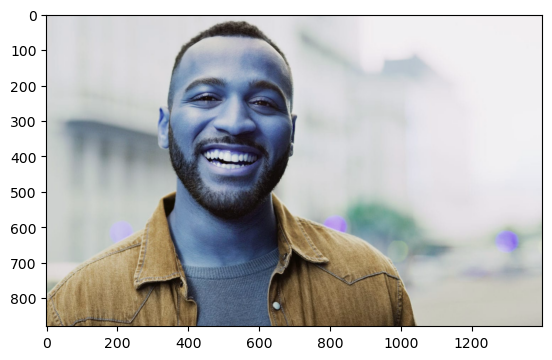

In [9]:
# Plotting the image
plt.imshow(img)
plt.show()

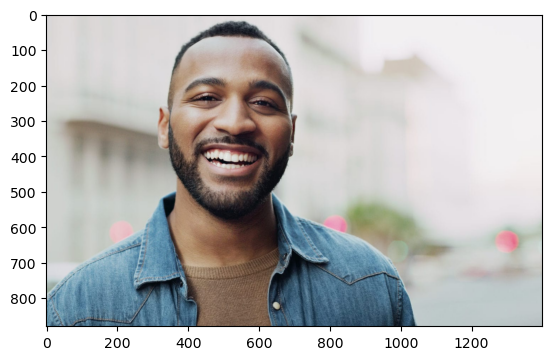

In [10]:
# The color is chnaged because the opencv reads the channels as BGR and matplotlib expects it to be RGB, so we can convert it into RGB.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# Checking and removing images based on their file extension
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [12]:
# Converting the images and files into a dataset and assigning a labels and data preprocessing using Keras.
tf.keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 202 files belonging to 2 classes.


In [14]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
# Now converting data into numpy
data_iterator = data.as_numpy_iterator()
data_iterator

In [16]:
batch = data_iterator.next()
batch

(array([[[[3.96875000e+01, 9.78984375e+01, 1.34898438e+02],
          [4.60898438e+01, 1.07671875e+02, 1.46253906e+02],
          [2.79453125e+01, 9.50546875e+01, 1.37054688e+02],
          ...,
          [1.51000000e+02, 1.94000000e+02, 2.13000000e+02],
          [1.51683594e+02, 1.94683594e+02, 2.13683594e+02],
          [1.52894531e+02, 1.95894531e+02, 2.14894531e+02]],
 
         [[4.81633301e+01, 1.05512108e+02, 1.41553955e+02],
          [4.68666763e+01, 1.07273682e+02, 1.43770538e+02],
          [3.90325089e+01, 1.02451485e+02, 1.40810852e+02],
          ...,
          [1.51215088e+02, 1.94215088e+02, 2.13215088e+02],
          [1.52138672e+02, 1.95138672e+02, 2.14138672e+02],
          [1.52942535e+02, 1.95942535e+02, 2.14942535e+02]],
 
         [[5.69359055e+01, 1.13092743e+02, 1.47610413e+02],
          [4.82128296e+01, 1.06304184e+02, 1.39612839e+02],
          [5.37106476e+01, 1.10989815e+02, 1.43554413e+02],
          ...,
          [1.51564453e+02, 1.94564453e+02, 2.1356

In [17]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [18]:
# Labels assigned to the images either happy or sad
batch[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

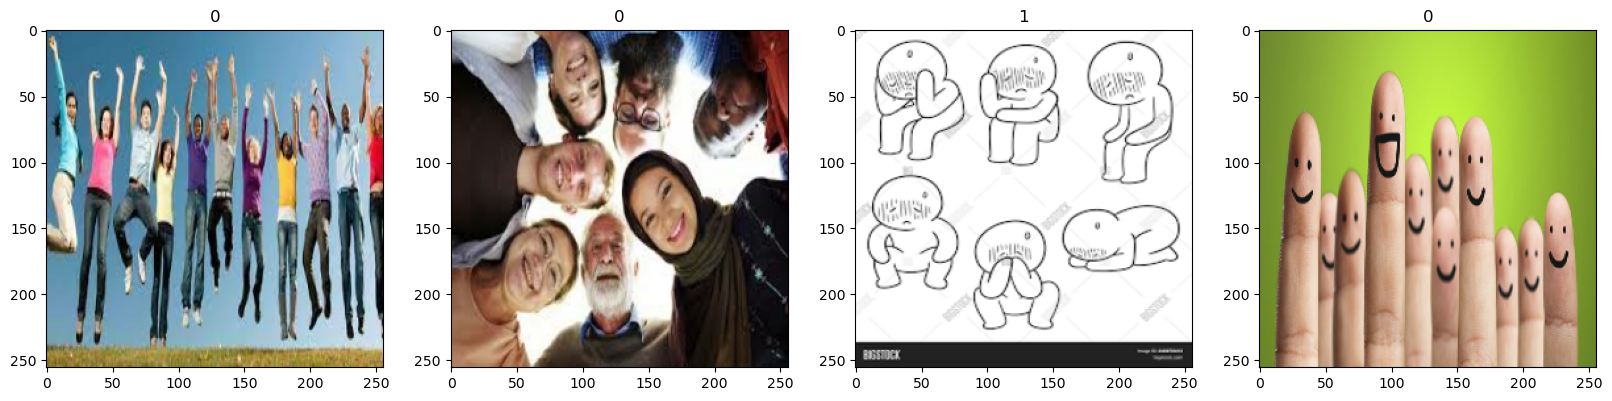

In [19]:
# Visualization for labels assigned to images happy(0) and sad(1)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Pre-Processing the Data

In [20]:
batch[0].min()

0.0

In [21]:
# To scale the data we will divide the batch with maximum value so that the values are scaled between 0 and 1.
batch[0].max()

255.0

In [22]:
# Scaling the data
data = data.map(lambda x,y: (x/255, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

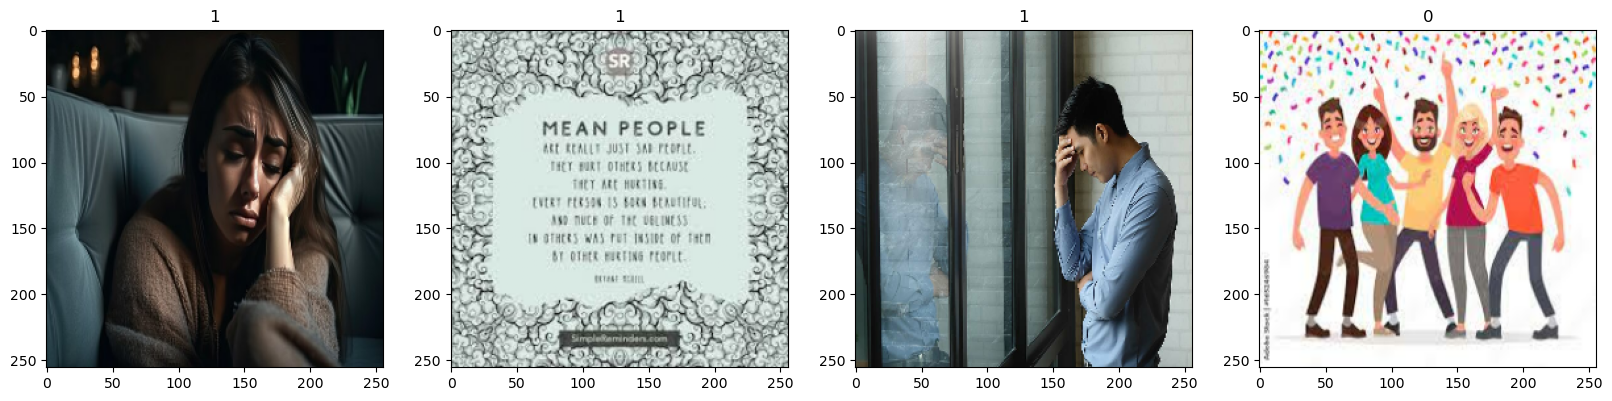

In [26]:
# Visualization for labels assigned to images happy(0) and sad(1)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [27]:
len(data)

7

In [28]:
# Spliting data into train-test
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [29]:
train_size + val_size + test_size

6

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Building The Deep Learning Model

In [31]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
# Initializing the model
model = Sequential()

In [33]:
# Adding the Convolutional Neural Network (CNN) using Keras api
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Setting up the compilation of the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
# Structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Training the model

In [36]:
# Defining log directory for storing logs
logdir = 'logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [38]:
# Training the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 27s 5s/step - loss: 0.9314 - accuracy: 0.5078 - val_loss: 0.8088 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 19s 5s/step - loss: 0.7182 - accuracy: 0.6016 - val_loss: 0.6532 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 18s 4s/step - loss: 0.6602 - accuracy: 0.5703 - val_loss: 0.6279 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 28s 8s/step - loss: 0.6528 - accuracy: 0.6484 - val_loss: 0.5829 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 20s 4s/step - loss: 0.6750 - accuracy: 0.5703 - val_loss: 0.6107 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 18s 4s/step - loss: 0.6296 - accuracy: 0.6094 - val_loss: 0.5580 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 17s 4s/step - loss: 0.5915 - accuracy: 0.7344 - val_loss: 0.5789 - val_accuracy: 0.6875
Epoch 8/20
4/4 [================

In [39]:
hist.history

{'loss': [0.9313606023788452,
  0.7182489633560181,
  0.6602022647857666,
  0.652773380279541,
  0.6749624013900757,
  0.6296408176422119,
  0.5914590358734131,
  0.5371088981628418,
  0.43484553694725037,
  0.39428508281707764,
  0.323962926864624,
  0.3336232602596283,
  0.27068790793418884,
  0.19411462545394897,
  0.15589642524719238,
  0.15132012963294983,
  0.09533608704805374,
  0.05333302915096283,
  0.03815901279449463,
  0.025486644357442856],
 'accuracy': [0.5078125,
  0.6015625,
  0.5703125,
  0.6484375,
  0.5703125,
  0.609375,
  0.734375,
  0.7890625,
  0.8515625,
  0.828125,
  0.8671875,
  0.84375,
  0.8984375,
  0.9765625,
  0.9609375,
  0.9375,
  0.9765625,
  1.0,
  0.9921875,
  0.984375],
 'val_loss': [0.8087787628173828,
  0.6532168388366699,
  0.6279004812240601,
  0.582941472530365,
  0.6107465624809265,
  0.5579870939254761,
  0.5789326429367065,
  0.4380846619606018,
  0.4426274299621582,
  0.3450179100036621,
  0.3267466723918915,
  0.2663293778896332,
  0.17752

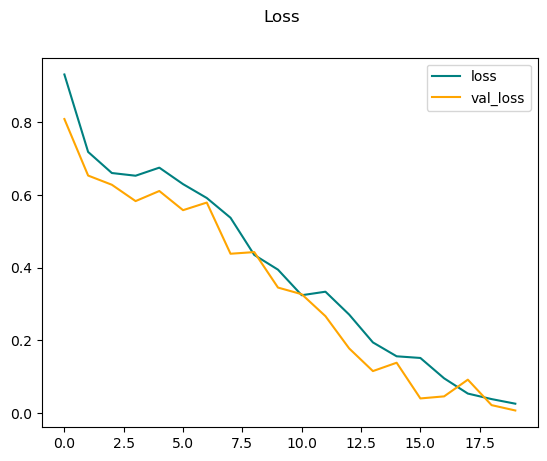

In [40]:
# Plotting the performance
fig = plt.figure() 
plt.plot(hist.history['loss'], color='teal', label='loss')  # Plots training loss in teal
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')  # Plots validation loss in orange
fig.suptitle('Loss')
plt.legend(loc="upper right")
plt.show()

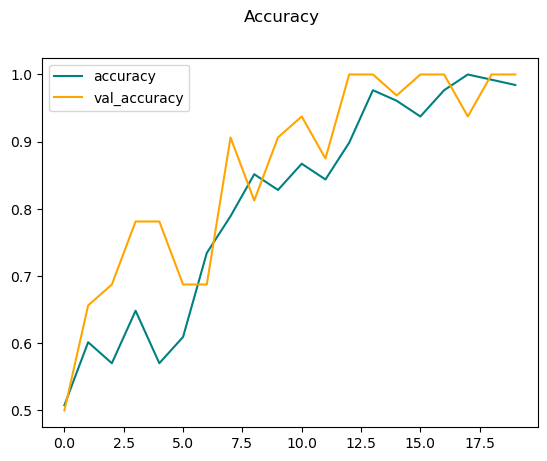

In [41]:
# Plotting the performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')  # Plots training loss in teal
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')  # Plots validation loss in orange
fig.suptitle('Accuracy') 
plt.legend()  
plt.show()  

### Evaluating performance of the model

In [42]:
# Importing the libraries for evaluating performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
# Initializing the metrics
pre = Precision()
Rec = Recall()
acc = BinaryAccuracy()

In [44]:
len(test)

1

In [45]:
# Calculating the metrics for the model
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  Rec.update_state(y, yhat)
  acc.update_state(y, yhat)

print('Precision:', pre.result().numpy())
print('Recall:', Rec.result().numpy())
print('Accuracy', acc.result().numpy())

1/1 [==============================] - 1s 839ms/step
Precision: 1.0
Recall: 1.0
Accuracy 1.0


### Testing the model

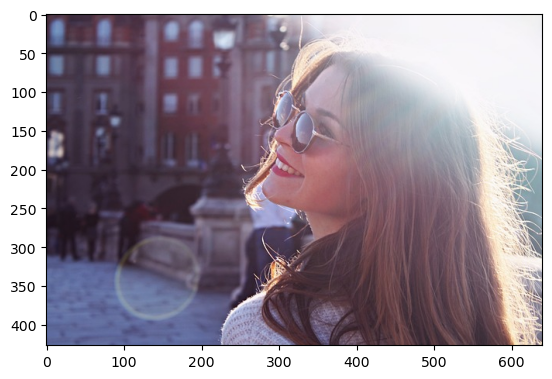

In [46]:
# Testing with the unseen image
img = cv2.imread('people-2560747_640.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

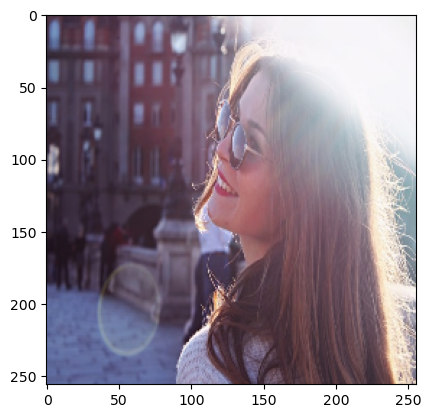

In [47]:
# Resize the image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
# Predicting the image
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 183ms/step


array([[0.02663488]], dtype=float32)

In [49]:
# Applying the threshold to predict the class
if yhat > 0.5:
  print('Predicted image is Sad')
else:
  print('Predicted image is Happy')

Predicted image is Happy


### Saving the model

In [50]:
from tensorflow.keras.models import load_model
model.save('Happy_Sad_Model.h5')

C:\Users\Prasad\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
#model.predict(np.expand_dims(resize/225, 0))

### Build app on Streamlit

In [52]:
%%writefile image_classifier.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
st.title('Image Classifier Happy or Sad')

upload_file = st.sidebar.file_uploader('Upload image', type='jpg')
generate_predict = st.sidebar.button('Predict')
model = tf.keras.models.load_model('Happy_Sad_Model.h5')
def prediction(image, model):
    return model.predict(np.expand_dims(tf.image.resize(image, (256,256))/225, 0))

if generate_predict:
    image = Image.open(upload_file)
    with st.expander('image', expanded=True):
        st.image(image, use_column_width=True)
    pred = prediction(image, model)
    
    if pred > 0.5:
        st.text('Predicted image is Sad')
    else:
        st.text('Predicted image is Happy')

Overwriting image_classifier.py


In [53]:
!streamlit run image_classifier.py

^C
